In [121]:
import numpy as np
import matplotlib.pyplot as plt

> ### Closed Form Solution & Gradient Descent Method

In [122]:

def Closed_Form(X, y):
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

def Gradient_Descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    w = np.zeros((n, 1))
    losses = []

    for epoch in range(epochs):

        y_pred = X @ w
        dw = (2/m) * ( X.T @ (y_pred - y))
        w -= learning_rate * dw

        loss=np.mean((y_pred - y)**2)
        losses.append(loss)
    
    return w,losses
    




> ### Generating Data Set

In [123]:
    
np.random.seed(22)
n=100

hrs = np.random.rand(n,1) * 10
X = np.hstack((np.ones((n,1)),hrs))

y = 3*hrs + 1 + 2* np.random.randn(n,1)  # rank


> ### W using Closed Form and Gradient Descent

In [124]:
w_closed = Closed_Form(X,y)
w_grad ,losses = Gradient_Descent(X,y)

print("Closed-form solution:")
print("w0:", w_closed[0][0])
print("w1:", w_closed[1][0])

print("\nGradient Descent:")
print("w0:", w_grad[0][0])
print("w1:", w_grad[1][0])


Closed-form solution:
w0: 2.036086729266145
w1: 2.8615655452354885

Gradient Descent:
w0: 2.0270264098305892
w1: 2.86291918061293


> # Plot

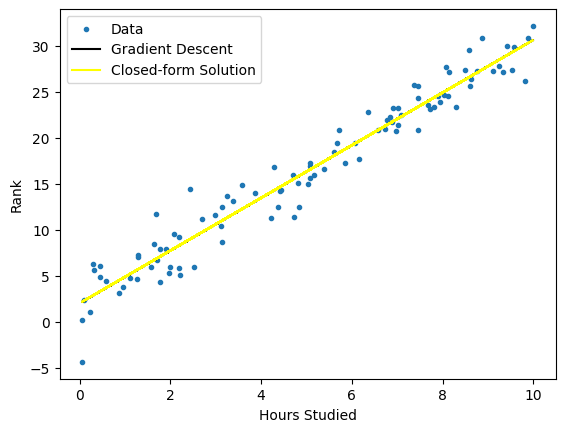

In [125]:
plt.scatter(hrs,y, label='Data' , marker='.')
plt.plot(hrs, X @ w_grad, color = 'black', label='Gradient Descent')
plt.plot(hrs,X @ w_closed,color='yellow', label='Closed-form Solution')

plt.xlabel('Hours Studied')
plt.ylabel('Rank')
plt.legend()
plt.show()

> ## Rank Predictor


In [126]:
def predict (hrs):
    r_closed = w_closed[0] + w_closed[1] * hrs
    r_grad = w_grad[0] + w_grad[1] * hrs
    return (r_closed, r_grad)

print(predict(5))

(array([16.34391446]), array([16.34162231]))


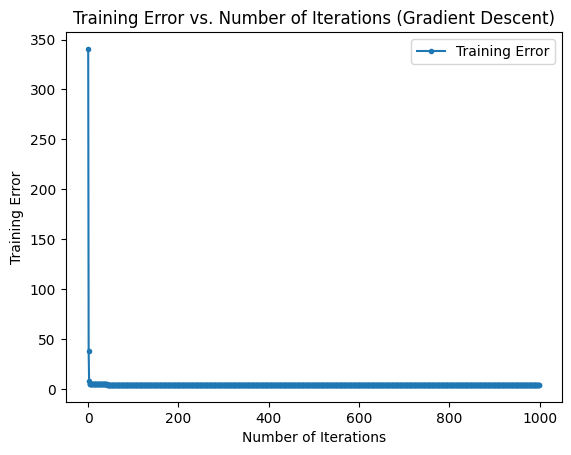

In [127]:
plt.plot(range(len(losses)),losses, label='Training Error',marker='.')
plt.xlabel('Number of Iterations')
plt.ylabel('Training Error')
plt.title('Training Error vs. Number of Iterations (Gradient Descent)')
plt.legend()
plt.show()

In [128]:
def Polynomial_Closed_Form(X, y, degree):
    # Generate the polynomial features
    X_poly = np.column_stack([X ** i for i in range(degree + 1)])

    # Use the closed-form solution
    w_poly = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

    # Compute the training error
    y_pred = X_poly @ w_poly
    training_error = np.mean((y_pred - y) ** 2)

    return w_poly, training_error



# Fit a 4th order polynomial using the closed-form solution
w_poly = Polynomial_Closed_Form(hrs, y, degree=4)


# Print the coefficients
print("Polynomial Coefficients (w0 to w4):")
print(w_poly)
#print(w_poly,np.shape(w_poly))



Polynomial Coefficients (w0 to w4):
(array([[ 1.31905533],
       [ 4.42825279],
       [-0.73245671],
       [ 0.11619714],
       [-0.00588223]]), 3.7819151839836653)


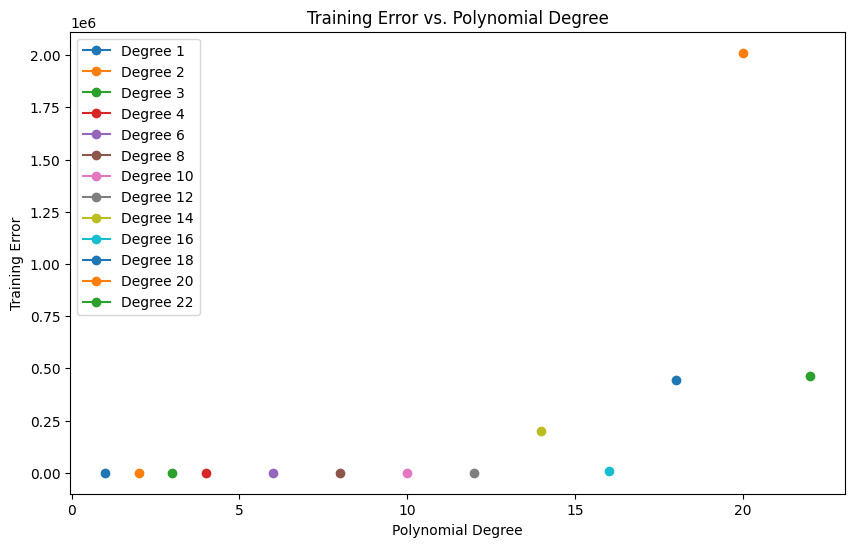

In [129]:


poly_degrees = [ 1, 2, 3, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]

# Plot training error for different polynomial degrees
plt.figure(figsize=(10, 6))

for degree in poly_degrees:
    w_poly, training_error = Polynomial_Closed_Form(hrs, y, degree)
    #print(">>",w_poly)
    plt.plot(degree, training_error, marker='o', label=f'Degree {degree}')

plt.xlabel('Polynomial Degree')
plt.ylabel('Training Error')
plt.title('Training Error vs. Polynomial Degree')
plt.legend()
plt.show()


>## Ridge Regression ( ℓ2  Normalization)

In [130]:

def Ridge_Regression(X, y, learning_rate=0.01, epochs=1000, λ=1e-6):
    m, n = X.shape
    w = np.zeros((n, 1))

    for epoch in range(epochs):
        y_pred = X @ w
        dw = (2/m) * (X.T @ (y - y_pred)) + 2 * λ * w
        w += learning_rate * dw

    return w

w_ridge = Ridge_Regression(X, y)


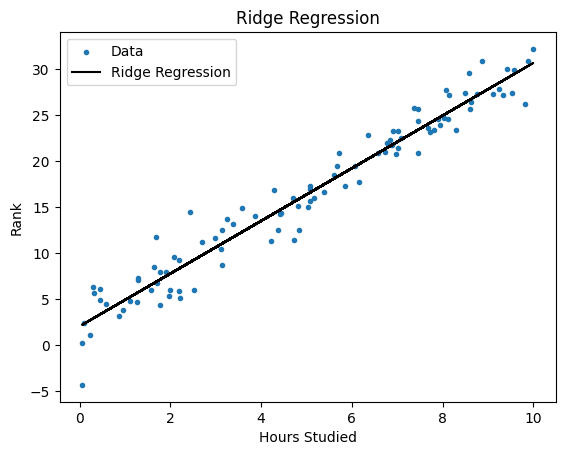

In [131]:

plt.scatter(hrs, y, label='Data', marker='.')
plt.plot(hrs, X @ w_ridge, color='black', label='Ridge Regression')

plt.xlabel('Hours Studied')
plt.ylabel('Rank')
plt.legend()
plt.title('Ridge Regression')
plt.show()

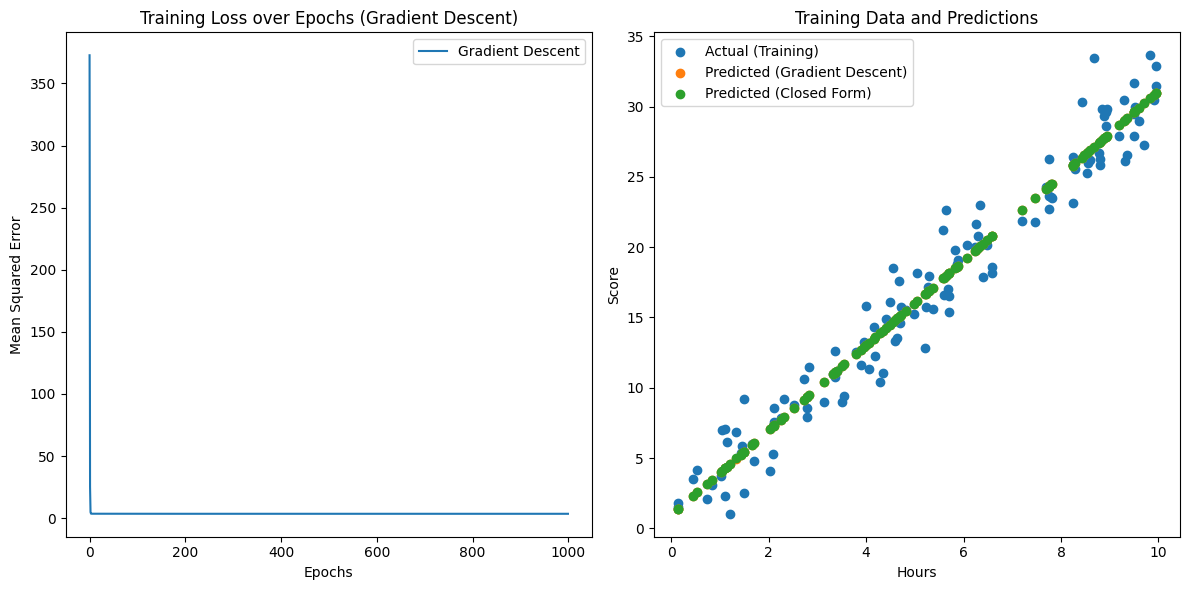

In [132]:

from sklearn.model_selection import train_test_split



# Generate random data
np.random.seed(2992)
n = 150
hrs = np.random.rand(n, 1) * 10
X = np.hstack((np.ones((n, 1)), hrs))
y = 3 * hrs + 1 + 2 * np.random.randn(n, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using Gradient Descent
w_gd, losses_gd = Gradient_Descent(X_train, y_train)

# Train the model using Closed Form solution
w_cf = Closed_Form(X_train, y_train)

# Evaluate the model on both training and testing sets
y_train_pred_gd = X_train @ w_gd
y_test_pred_gd = X_test @ w_gd

y_train_pred_cf = X_train @ w_cf
y_test_pred_cf = X_test @ w_cf

# Plot the performance curves
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(losses_gd, label='Gradient Descent')
plt.title('Training Loss over Epochs (Gradient Descent)')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 1], y_train, label='Actual (Training)')
plt.scatter(X_train[:, 1], y_train_pred_gd, label='Predicted (Gradient Descent)')
plt.scatter(X_train[:, 1], y_train_pred_cf, label='Predicted (Closed Form)')
plt.title('Training Data and Predictions')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()
